# SMU BOSS Bid Price Analytics

### Import necessary libraries

In [269]:
import pandas as pd
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### Data Preprocessing

In [270]:
data = pd.read_excel("data/merged_file.xls")
print(f"Unfiltered Number of rows: {data.shape[0]}")

# Handling missing data: Remove rows with "Median Bid" equal to 0 or empty "Instructor" column
filtered_data = data.drop(data[(data["Median Bid"] == 0) | (data["Instructor"].fillna("") == "") | (data["Session"] != "Regular Academic Session")].index)
filtered_data["round_successful_bids"] = filtered_data["Before Process Vacancy"] - filtered_data["After Process Vacancy"]

# Delete unnecessary columns
cols_to_delete = ["D.I.C.E"]
filtered_data.drop(columns=cols_to_delete, inplace=True)
print(filtered_data.columns)

Unfiltered Number of rows: 147998
Index(['Term', 'Session', 'Bidding Window', 'Course Code', 'Description',
       'Section', 'Vacancy', 'Opening Vacancy', 'Before Process Vacancy',
       'After Process Vacancy', 'Enrolled Students', 'Median Bid', 'Min Bid',
       'Instructor', 'School/Department', 'round_successful_bids'],
      dtype='object')


## Filter Dataframe by Course Code

In [289]:
course_code = "COR-MGMT1302"

course_data = filtered_data[filtered_data["Course Code"] == course_code]
print(f"Instructor Data Shape: {course_data.shape}")
course_data.head()

Instructor Data Shape: (677, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
1222,2022-23 Term 1,Regular Academic Session,Round 2A Window 2,COR-MGMT1302,"Business, Government and Society",G12,45.0,45.0,1.0,0.0,45.0,10.01,10.01,ER JWEE PING,LKCSOB,1.0
2282,2022-23 Term 1,Regular Academic Session,Round 2A Window 1,COR-MGMT1302,"Business, Government and Society",G2,45.0,45.0,1.0,0.0,45.0,30.00,30.00,GILBERT TAN YIP WEI,LKCSOB,1.0
2287,2022-23 Term 1,Regular Academic Session,Round 2A Window 1,COR-MGMT1302,"Business, Government and Society",G7,45.0,45.0,1.0,0.0,45.0,12.99,12.99,MOHAMED IRSHAD ABBAS ALI,LKCSOB,1.0
3339,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-MGMT1302,"Business, Government and Society",G13,45.0,45.0,1.0,0.0,45.0,27.00,27.00,ER JWEE PING,LKCSOB,1.0
3346,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-MGMT1302,"Business, Government and Society",G8,45.0,45.0,1.0,0.0,45.0,10.00,10.00,LOO KHEE SHENG,LKCSOB,1.0


### Explore Bid Price for the specified course code

In [290]:
min_median_value = course_data["Median Bid"].min()
max_median_value = course_data["Median Bid"].max()
median_median_value = round(course_data["Median Bid"].median(), 2)
mean_median_value = round(course_data["Median Bid"].mean(), 2)
print(f"The min, max, median and mean values for ALL of {course_code}'s median bid prices are {min_median_value, max_median_value, median_median_value, mean_median_value} respectively.")

The min, max, median and mean values for ALL of COR-MGMT1302's median bid prices are (10.0, 90.0, 23.57, 25.6) respectively.


### Which Instructors teach the specified course?

In [291]:
unique_instructors = course_data["Instructor"].unique()
print(f"Instructors that teach {course_code}: {unique_instructors}")

Instructors that teach COR-MGMT1302: [' ER JWEE PING' ' GILBERT TAN YIP WEI' ' MOHAMED IRSHAD ABBAS ALI'
 ' LOO KHEE SHENG' ' FRANCIS PAVRI' ' ELIZABETH SU' ' CHAN KAY MIN'
 ' TAN WEE LIANG' ' RAJAH KUMAR']


## Filter dataframe by Instructor

In [292]:
instructor_name = "GILBERT TAN YIP WEI"

# Remove leading and trailing whitespace from instructor names column
course_data.loc[:, "Instructor"] = course_data["Instructor"].str.strip()

instructor_course_data = course_data[course_data["Instructor"] == instructor_name]
print(f"Instructor Course Data Shape: {instructor_course_data.shape}")
instructor_course_data.head()

Instructor Course Data Shape: (85, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
2282,2022-23 Term 1,Regular Academic Session,Round 2A Window 1,COR-MGMT1302,"Business, Government and Society",G2,45.0,45.0,1.0,0.0,45.0,30.00,30.00,GILBERT TAN YIP WEI,LKCSOB,1.0
5455,2022-23 Term 1,Regular Academic Session,Round 2 Window 1,COR-MGMT1302,"Business, Government and Society",G3,45.0,45.0,1.0,0.0,45.0,33.17,33.17,GILBERT TAN YIP WEI,LKCSOB,1.0
9684,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-MGMT1302,"Business, Government and Society",G1,45.0,22.0,2.0,0.0,22.0,44.01,42.00,GILBERT TAN YIP WEI,LKCSOB,2.0
9688,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-MGMT1302,"Business, Government and Society",G2,45.0,22.0,2.0,0.0,22.0,51.70,51.70,GILBERT TAN YIP WEI,LKCSOB,2.0
9689,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-MGMT1302,"Business, Government and Society",G3,45.0,22.0,2.0,0.0,22.0,58.25,57.92,GILBERT TAN YIP WEI,LKCSOB,2.0


### Explore Bid Price for the specified instructor for the specified course

In [294]:
min_course_median_value = instructor_course_data["Median Bid"].min()
max_course_median_value = instructor_course_data["Median Bid"].max()
median_course_median_value = round(instructor_course_data["Median Bid"].median(), 2)
mean_course_median_value = round(instructor_course_data["Median Bid"].mean(), 2)
print(f"The min, max, median and mean values for {instructor_name}'s {course_code} median bid prices are {min_course_median_value, max_course_median_value, median_course_median_value, mean_course_median_value} respectively.")

The min, max, median and mean values for GILBERT TAN YIP WEI's COR-MGMT1302 median bid prices are (10.0, 58.25, 29.38, 29.54) respectively.


## Filter dataframe by Academic Year and/or Term

In [295]:
AY = "2022-23"
# Filter by Term (Term 1 or Term 2)?
term = "Term 2"
if term:
    AY += f" {term}"
    
instructor_course_data = instructor_course_data.sort_values(by="Bidding Window", ignore_index=True)
instructor_course_data = instructor_course_data[instructor_course_data["Term"].str.contains(AY, case=False)]
print(f"{instructor_name} taught {len(instructor_course_data['Term'].to_list())} classes for {course_code} in these terms in {AY} ")
instructor_course_data.head()

GILBERT TAN YIP WEI taught 6 classes for COR-MGMT1302 in these terms in 2022-23 Term 2 


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
0,2022-23 Term 2,Regular Academic Session,Incoming Exchange Rnd 1C Win 1,COR-MGMT1302,"Business, Government and Society",G7,45.0,45.0,3.0,0.0,45.0,25.00,25.00,GILBERT TAN YIP WEI,LKCSOB,3.0
26,2022-23 Term 2,Regular Academic Session,Round 1 Window 1,COR-MGMT1302,"Business, Government and Society",G7,45.0,38.0,38.0,0.0,38.0,36.99,35.88,GILBERT TAN YIP WEI,LKCSOB,38.0
37,2022-23 Term 2,Regular Academic Session,Round 1 Window 2,COR-MGMT1302,"Business, Government and Society",G7,45.0,38.0,2.0,0.0,38.0,48.99,48.99,GILBERT TAN YIP WEI,LKCSOB,2.0
49,2022-23 Term 2,Regular Academic Session,Round 1A Window 1,COR-MGMT1302,"Business, Government and Society",G7,45.0,40.0,2.0,0.0,40.0,56.10,52.99,GILBERT TAN YIP WEI,LKCSOB,2.0
58,2022-23 Term 2,Regular Academic Session,Round 1A Window 2,COR-MGMT1302,"Business, Government and Society",G7,45.0,42.0,2.0,0.0,42.0,52.57,50.00,GILBERT TAN YIP WEI,LKCSOB,2.0


## Bid Price Visualisation for specified prof, course, AY and/or Term:

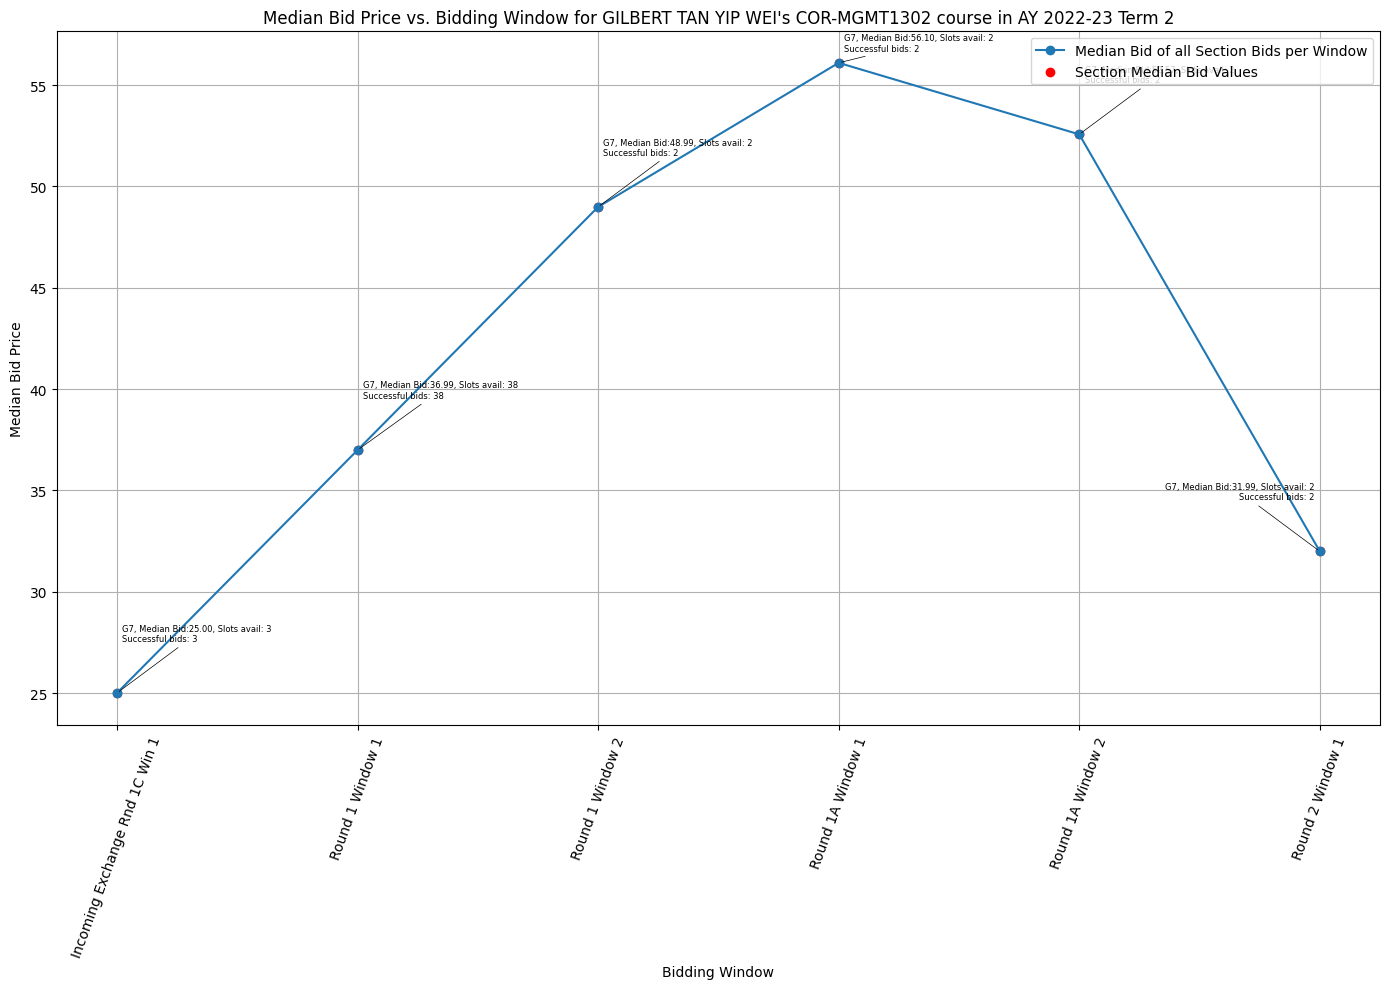

In [296]:
median_bid_by_window = instructor_course_data.groupby('Bidding Window')['Median Bid'].median().reset_index()

plt.figure(figsize=(14, 10))

# Plot the median bid values by window as a line
plt.plot(
    median_bid_by_window['Bidding Window'],
    median_bid_by_window['Median Bid'],
    marker='o',
    label='Median Bid of all Section Bids per Window'
)

# Plot all individual bid values as points
plt.scatter(
    instructor_course_data['Bidding Window'],
    instructor_course_data['Median Bid'],
    color='red',
    label='Section Median Bid Values'
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name}'s {course_code} course in AY {AY}")
plt.xlabel('Bidding Window')
plt.ylabel('Median Bid Price')
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()

max_y_values = {}

# Annotate data points with their "Section" value and adjust y-coordinate dynamically
annotations = []
for x, y, sem, section, slots_avail, round_successful_bids in zip(instructor_course_data["Bidding Window"], instructor_course_data["Median Bid"],instructor_course_data["Term"], instructor_course_data["Section"], instructor_course_data["Before Process Vacancy"], instructor_course_data["round_successful_bids"]):
    max_y = max_y_values.get(x, 0) 
    y_offset = max_y + 2
    max_y_values[x] = y_offset
    displayed_text = f"{section}, Median Bid:{y:.2f}, Slots avail: {int(slots_avail)}\nSuccessful bids: {int(round_successful_bids)}"
    if not term:
        displayed_text = f"Term {sem[-1]} {displayed_text}"
        print(displayed_text)
    annotation = plt.annotate(displayed_text, (x, y),
                            textcoords="offset points",
                            xytext=(0, y_offset),
                            ha='center', fontsize=6,
                            arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))
    annotations.append(annotation)

# Use the adjust_text function to adjust the position of overlapping annotations
adjust_text(annotations, autoalign="xy", only_move={"points": "xy"})

plt.legend()
plt.show()

## Visualise each Instructor's min, mean and median bids with a Bar chart

In [298]:
# we want to create our own dataframe with the min, max mean and median median bid values
data = []

for instructor_name in unique_instructors:
    instructor_data = course_data[course_data["Instructor"] == instructor_name.strip()]
    min_value = instructor_data["Median Bid"].min()
    max_value = instructor_data["Median Bid"].max()
    median_value = round(instructor_data["Median Bid"].median(), 2)
    mean_value = round(instructor_data["Median Bid"].mean(), 2)
    data.append([instructor_name, min_value, max_value, mean_value, median_value])

# Create a DataFrame from the collected results
data_df = pd.DataFrame(data, columns=["Instructor", "Min Median Bid", "Max Median Bid", "Median Median Bid", "Mean Median Bid"])
print(data_df)
data_df.head()


                  Instructor  Min Median Bid  Max Median Bid  \
0               ER JWEE PING           10.00           45.60   
1        GILBERT TAN YIP WEI           10.00           58.25   
2   MOHAMED IRSHAD ABBAS ALI           10.00           49.33   
3             LOO KHEE SHENG           10.00           78.08   
4              FRANCIS PAVRI           10.00           55.90   
5               ELIZABETH SU           11.17           52.75   
6               CHAN KAY MIN           10.00           42.10   
7              TAN WEE LIANG           10.00           90.00   
8                RAJAH KUMAR           10.99           38.88   

   Median Median Bid  Mean Median Bid  
0              23.31            20.83  
1              29.54            29.38  
2              23.31            21.60  
3              30.79            30.14  
4              28.86            28.57  
5              30.04            27.24  
6              19.71            18.00  
7              24.36            20.87  

,Instructor,Min Median Bid,Max Median Bid,Median Median Bid,Mean Median Bid
0,ER JWEE PING,10.0,45.60,23.31,20.83
1,GILBERT TAN YIP WEI,10.0,58.25,29.54,29.38
2,MOHAMED IRSHAD ABBAS ALI,10.0,49.33,23.31,21.60
3,LOO KHEE SHENG,10.0,78.08,30.79,30.14
4,FRANCIS PAVRI,10.0,55.90,28.86,28.57


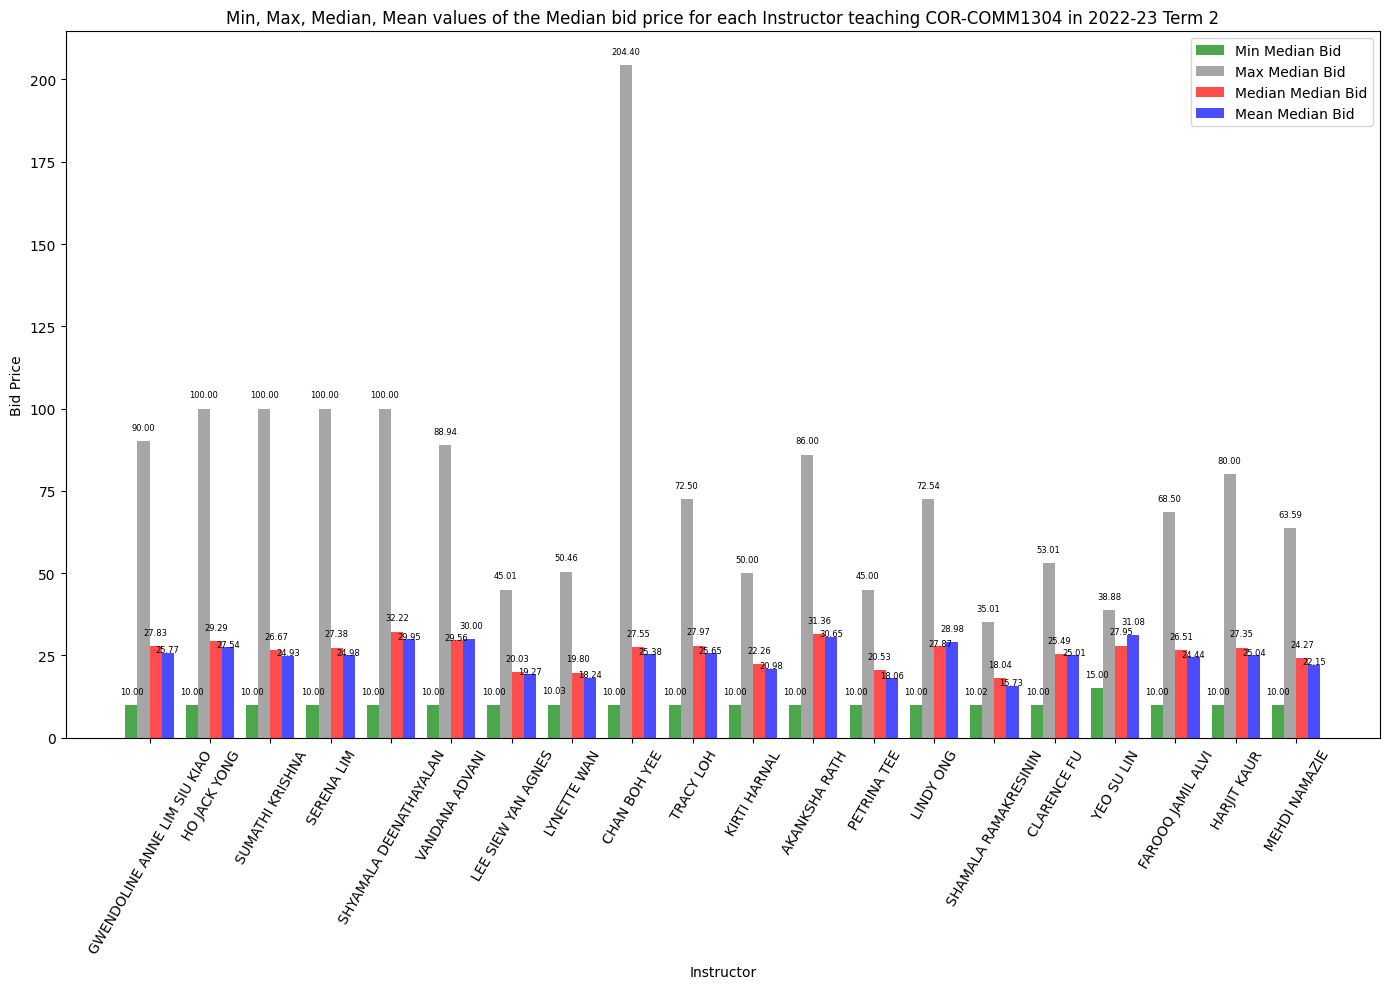

In [279]:
# choose bars you want to show:
show_min_bar = True
show_max_bar = True
show_median_bar = True
show_mean_bar = True


# Create an array of x-coords for each instructor
x = np.arange(len(data_df["Instructor"]))

group_width = 0.2 

# Create a vertical bar chart with no spaces between bars within an instructor's group
plt.figure(figsize=(14, 10))

bar_chart_annotations = []
def add_values_on_bars(bars):
    global bar_chart_annotations
    for bar in bars:
        height = bar.get_height()
        annotation = plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 6), textcoords='offset points', ha='center', va='bottom', fontsize=6)
        bar_chart_annotations.append(annotation)

if show_min_bar:
    min_bars = plt.bar(x - 1.5*group_width, data_df["Min Median Bid"], width=group_width, label="Min Median Bid", alpha=0.7, color="green")
    add_values_on_bars(min_bars)
if show_max_bar:
    max_bars = plt.bar(x - 0.5*group_width, data_df["Max Median Bid"], width=group_width, label="Max Median Bid", alpha=0.7, color="grey")
    add_values_on_bars(max_bars)
if show_median_bar:
    median_bars = plt.bar(x + 0.5*group_width, data_df["Median Median Bid"], width=group_width, label="Median Median Bid", alpha=0.7, color="red")
    add_values_on_bars(median_bars)
if show_mean_bar:
    mean_bars = plt.bar(x + 1.5 * group_width, data_df["Mean Median Bid"], width=group_width, label="Mean Median Bid", alpha=0.7, color="blue")
    add_values_on_bars(mean_bars)




adjust_text(bar_chart_annotations, autoalign="y", only_move={"points": "y"})

plt.xticks(x, data_df["Instructor"], rotation=60)
plt.xlabel("Instructor")
plt.ylabel("Bid Price")
plt.title(f"Min, Max, Median, Mean values of the Median bid price for each Instructor teaching {course_code} in {AY}")
plt.legend()

plt.tight_layout()
plt.show()

## Lets visualise the year over year bid prices for a specified BIDDING WINDOW AND INSTRUCTOR

In [299]:
specified_bidding_window = "Round 1 Window 1"

# re-initialise instructor_course_data dataframe as we do not want to use the instructor_course_data df above which has been filtered to the specified year
instructor_name = "GILBERT TAN YIP WEI"
instructor_course_data = course_data[course_data["Instructor"] == instructor_name]
window_course_data = instructor_course_data[instructor_course_data["Bidding Window"] == specified_bidding_window]
window_course_data = window_course_data.sort_values(by="Term", ascending=True)

# print(window_course_data["Median Bid"].tolist())
# Group filtered data by year and calculate the mean Median Bid for each year
yearly_instructor_course_data = window_course_data.groupby('Term')['Median Bid'].mean().reset_index()
yearly_instructor_course_data = yearly_instructor_course_data.sort_values(by="Term", ascending=True)

# renamed yearly_data df column headers to aid better understanding
yearly_instructor_course_data.rename(columns={"Median Bid": "Mean of Median Bids"}, inplace=True)
yearly_instructor_course_data.head()


,Term,Mean of Median Bids
0,2019-20 Term 1,22.000
1,2019-20 Term 2,21.155
2,2020-21 Term 1,26.500
3,2020-21 Term 2,23.045
4,2021-22 Term 1,30.260


### Lets use a Linear Regression model to plot a best fit line and make bid price predictions for future Terms

In [300]:
# We will perform label encoding for the Terms
label_encoder = LabelEncoder()
yearly_instructor_course_data["Term"] = label_encoder.fit_transform(yearly_instructor_course_data["Term"])

X = yearly_instructor_course_data[["Term"]]
Y = yearly_instructor_course_data["Mean of Median Bids"]

reg_model = LinearRegression()
reg_model.fit(X, Y)

yearly_instructor_course_data.head()

,Term,Mean of Median Bids
0,0,22.000
1,1,21.155
2,2,26.500
3,3,23.045
4,4,30.260


In [302]:
# Find the latest term and calculate the upcoming term as the next integer value
latest_term = yearly_instructor_course_data["Term"].max()
upcoming_term = latest_term + 1

predicted_bid_upcoming_term = reg_model.predict([[upcoming_term]])

print(f"Predicted Median Bid for the upcoming Term: {predicted_bid_upcoming_term[0]:.2f}")

Predicted Median Bid for the upcoming Term: 37.83


/Users/qingyuliu/PycharmProjects/bossanalytics/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


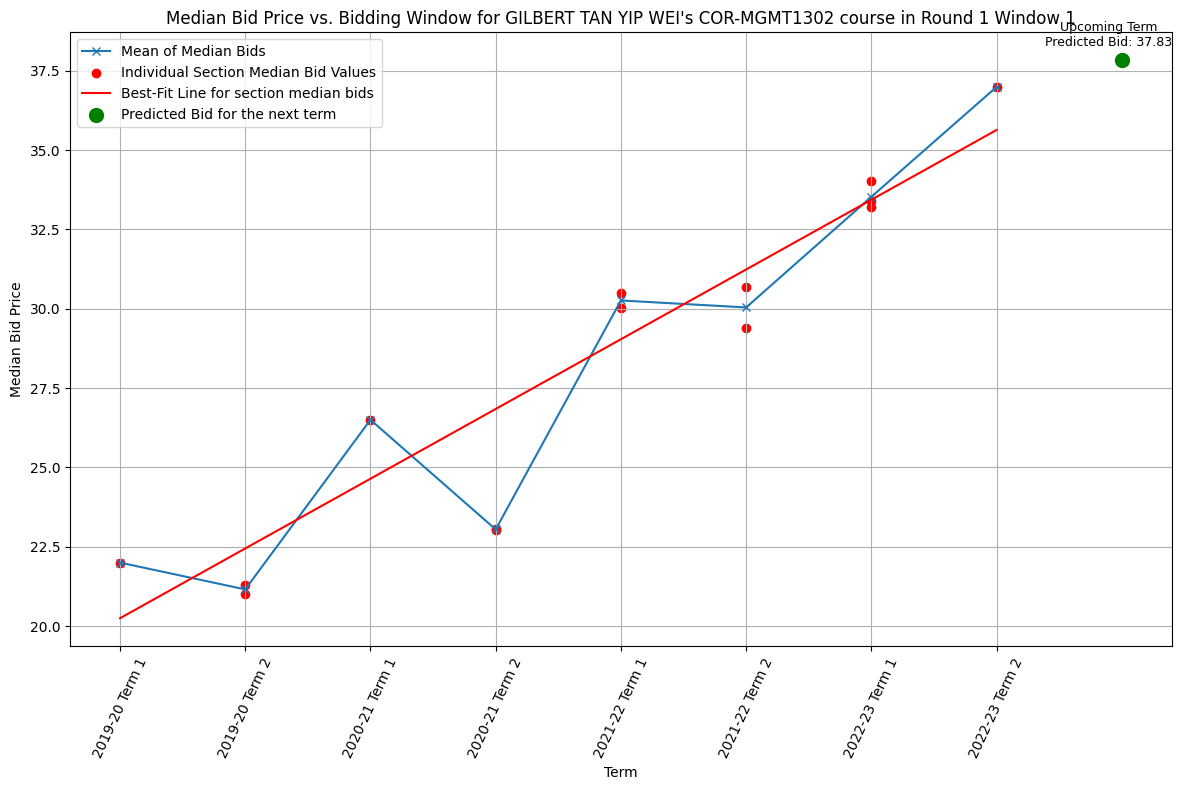

In [303]:
plt.figure(figsize=(12, 8))

plt.plot(
    yearly_instructor_course_data["Term"],
    yearly_instructor_course_data["Mean of Median Bids"],
    marker="x",
    label="Mean of Median Bids"
)

plt.scatter(
    window_course_data["Term"],
    window_course_data["Median Bid"],
    color="red",
    label="Individual Section Median Bid Values"
)

# Lets use out linear reg model to plot a best fit line
plt.plot(X, reg_model.predict(X), color='red', label='Best-Fit Line for section median bids')

plt.scatter(
    upcoming_term,
    predicted_bid_upcoming_term,
    color='green',
    marker='o',
    s=100,
    label=f'Predicted Bid for the next term'
)

# Annotate the predicted point with its value
plt.annotate(
    f"Upcoming Term\nPredicted Bid: {predicted_bid_upcoming_term[0]:.2f}",
    (upcoming_term, predicted_bid_upcoming_term),
    textcoords="offset points",
    xytext=(-9.5,10),  # Adjust the position of the text above the point
    ha="center",
    fontsize=9,
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name}'s {course_code} course in {specified_bidding_window}")
plt.xlabel("Term")
plt.ylabel("Median Bid Price")
plt.xticks(rotation=65)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()